Grupo 6

Deicy Santos
David Gutierrez

In [1]:
import numpy as  np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


Para mostrar que el método mencionado en este artículo se puede aplicar a datos del mundo real, usaré datos de una Lista de países por producción de carbón en Wikipedia(https://en.wikipedia.org/wiki/List_of_countries_by_coal_production). Este artículo muestra una lista de estados y territorios soberanos por producción de carbón superior a 5 millones de toneladas a partir de 2020.\
Seguí los pasos útiles y prácticos para descargar los datos de Web Scraping a Wikipedia Table into a Dataframe. https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451

In [2]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [3]:
import requests 
from bs4 import BeautifulSoup
wikiurl='https://es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_poblaci%C3%B3n'
table_class='wikitable sortable jquery-tablesorter'

response=requests.get(wikiurl)
#status 200: The server successfully answered the http request 
print(response.status_code)

200


Después de la descarga, analice los datos descargados con BeautifulSoup(https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table',{'class':"wikitable"})

df_Deptos = pd.read_html(str(table))[0]
df_Deptos

,N.º,Departamento,Población Cabecera,Población Resto,Población Total
0,1.0,Bogotá,7 715 778,28 177,7 743 955
1,2.0,Antioquia,5 281 409,1 396 521,6 677 930
2,3.0,Valle del Cauca,3 866 560,665 592,4 532 152
3,4.0,Cundinamarca,2 401 827,841 172,3 242 999
4,5.0,Atlántico,2 282 828,139 300,2 722 128
5,6.0,Santander,1 745 543,535 365,2 280 908
6,7.0,Bolívar,1 618 648,562 328,2 180 976
7,8.0,Córdoba,952 215,876 732,1 828 947
8,9.0,Nariño,713 629,913 960,1 627 589
9,10.0,Norte de Santander,1 282 673,337 645,1 620 318


En este artículo, seleccionaré algunos países europeos con la cantidad de producción de carbón en 2020. Por ejemplo, los países seleccionados son Rusia, Alemania, Polonia, República Checa, Ucrania, Rumania, Grecia y Bulgaria.

Si desea seleccionar otros países o cambiar el año, no dude en modificar los códigos a continuación.

In [5]:
list_Depto = ['Atlántico','La Guajira', 'Cesar', 'Magdalena','Córdoba','Sucre','Bolívar']

In [6]:
list_Depto

['Atlántico',
 'La Guajira',
 'Cesar',
 'Magdalena',
 'Córdoba',
 'Sucre',
 'Bolívar']

In [7]:
df_Depto_filtro = df_Deptos[df_Deptos['Departamento'].isin(list_Depto)]
df_Depto_filtro = df_Depto_filtro.iloc[:,[1,4]]
df_Depto_filtro.rename(columns={'Población Total':'Pob_Total'}, inplace=True)
df_Depto_filtro.reset_index(drop=True, inplace=True)
df_Depto_filtro

,Departamento,Pob_Total
0,Atlántico,2 722 128
1,Bolívar,2 180 976
2,Córdoba,1 828 947
3,Magdalena,1 427 026
4,Cesar,1 295 387
5,La Guajira,965 718
6,Sucre,949 252


In [8]:
import re
regex = re.compile(r'[^0-9]')
df_Depto_filtro['Pob_Total'] = df_Depto_filtro['Pob_Total'].replace(regex,"").astype(int)
df_Depto_filtro

,Departamento,Pob_Total
0,Atlántico,2722128
1,Bolívar,2180976
2,Córdoba,1828947
3,Magdalena,1427026
4,Cesar,1295387
5,La Guajira,965718
6,Sucre,949252


In [9]:
df_Depto_filtro2 = pd.melt(df_Depto_filtro, id_vars=['Departamento'],
                  value_vars='Pob_Total',
                  var_name='Medida', value_name='Value')

df_Depto_filtro2['Percent'] = [round(i*100/sum(df_Depto_filtro2.Value),1) for i in df_Depto_filtro2.Value]
df_Depto_filtro2

,Departamento,Medida,Value,Percent
0,Atlántico,Pob_Total,2722128,23.9
1,Bolívar,Pob_Total,2180976,19.2
2,Córdoba,Pob_Total,1828947,16.1
3,Magdalena,Pob_Total,1427026,12.6
4,Cesar,Pob_Total,1295387,11.4
5,La Guajira,Pob_Total,965718,8.5
6,Sucre,Pob_Total,949252,8.3


Antes de continuar, tracemos un gráfico circular para compararlo con el resultado obtenido en este artículo más adelante.

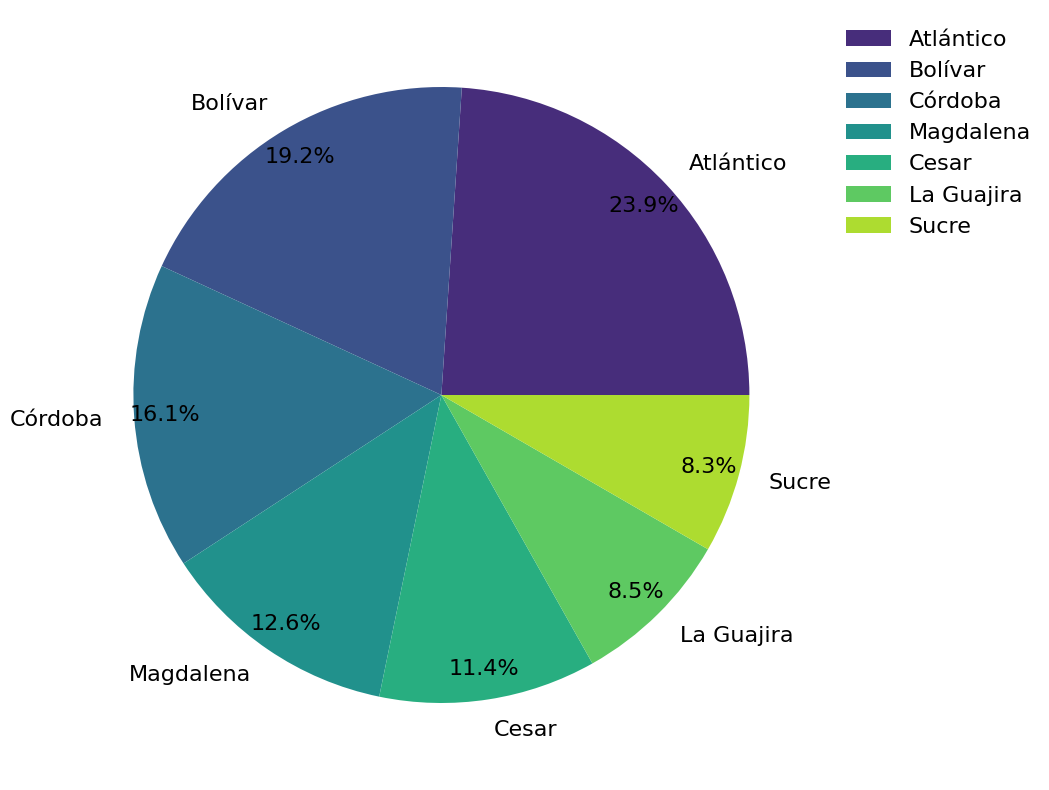

In [10]:
#get a color list, palette name can be changed
pal_ = list(sns.color_palette(palette='viridis',
                              n_colors=len(list_Depto)).as_hex())
#plot a pie chart
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})
plt.pie(df_Depto_filtro2.Value,
        labels= df_Depto_filtro2.Departamento,
        colors=pal_, autopct='%1.1f%%',
        pctdistance=0.9)
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.show()

El gráfico circular muestra las proporciones de ciudadanos por cada departamento de la costa caribe colombiana.

Visualización de datos
Este artículo cubrirá 9 visualizaciones para usar en lugar de un gráfico circular. Estas alternativas se pueden clasificar en dos grupos:\

#### Gráficos circulares

* Gráfico con mancuernas (también conocido como gráfico con barra)
* Gráfico de burbujas
* Embalaje circular
* Gráfico circular interactivo
* Gráfico de anillos interactivo\
\
### Otras formas

* Mapa de árbol
* Gráfico de gofres
* Gráfico de barras
* Gráfico de barras apiladas

### 1 Comparación de cada categoría con un gráfico con mancuernas (también conocido como gráfico con barra)

Un gráfico con mancuernas es un gráfico para comparar dos puntos de datos. Como se mencionó anteriormente, comparar sectores en un gráfico circular puede ser difícil. Podemos hacer la comparación para cada categoría con un gráfico con mancuernas.

Como su nombre, el gráfico con mancuernas consta de dos gráficos circulares unificados con una línea recta. Normalmente, el gráfico Dumbell se usa para comparar valores de datos. En este artículo, estableceremos el rango del eje X de 0 a 100 por ciento para mostrar los porcentajes de producción de carbón.

Por ejemplo, podemos comparar países o mostrar el porcentaje de cada país en comparación con el resto. En primer lugar, crearemos otro DataFrame para aplicar con el gráfico con mancuernas.

In [11]:
df_select = df_Depto_filtro2[['Departamento', 'Percent']]
df_select['Label_color'] = [i for i in df_Depto_filtro2['Departamento']]

df_coalmod = df_Depto_filtro2[['Departamento']]
df_coalmod['Percent'] = [100-i for i in df_Depto_filtro2['Percent']]
df_coalmod['Label_color'] = ['Other countries']*len(list_Depto)

df_db = pd.concat([df_select, df_coalmod],axis=0)
df_db

C:\Users\germa\AppData\Local\Temp\ipykernel_2164\1663838585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Label_color'] = [i for i in df_Depto_filtro2['Departamento']]
C:\Users\germa\AppData\Local\Temp\ipykernel_2164\1663838585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coalmod['Percent'] = [100-i for i in df_Depto_filtro2['Percent']]
C:\Users\germa\AppData\Local\Temp\ipykernel_2164\1663838585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Departamento,Percent,Label_color
0,Atlántico,23.9,Atlántico
1,Bolívar,19.2,Bolívar
2,Córdoba,16.1,Córdoba
3,Magdalena,12.6,Magdalena
4,Cesar,11.4,Cesar
5,La Guajira,8.5,La Guajira
6,Sucre,8.3,Sucre
0,Atlántico,76.1,Other countries
1,Bolívar,80.8,Other countries
2,Córdoba,83.9,Other countries


In [12]:
#create a dictionary to color each country
color_country = dict(zip(list_Depto,pal_))
#add a color to the dictionary
color_country['Other countries'] = '#b9b9b9'

#select countries and add a column to set the Y-axis value
df_ = df_select.iloc[0:2,:]
df_['Y'] = [1]*len(df_)

import plotly.express as px
fig = px.scatter(df_, x='Percent', y='Y', color='Label_color',
                 text = [str(i)+' %' for i in df_.Percent][0:len(df_)],
                 opacity=1,
                 color_discrete_map=color_country)

fig.update_layout(width = 950, height = 300, plot_bgcolor = 'white',
                  margin = dict(t=40, l=20, r=20, b=20),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Countries'),
                  showlegend=True)

for c in list_Depto:
    df = df_[df_['Departamento']==c]
    fig.add_shape(type="line", layer="below",
                  line=dict(color='black', width=6),
                  y0=1, x0=list(df_.Percent)[0],
                  y1=1, x1=list(df_.Percent)[1])

fig.update_traces(textposition='top center', marker={'size':65},
                  textfont=dict(color='black'))
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=True, showgrid =False, range=[-1, 101]) 
fig.show()

C:\Users\germa\AppData\Local\Temp\ipykernel_2164\2065382087.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Y'] = [1]*len(df_)


In [13]:
#create a dictionary to color each country
color_country = dict(zip(list_Depto,pal_))
#add a color to the dictionary
color_country['Other countries'] = '#b9b9b9'

import plotly.express as px
fig = px.scatter(df_db, x='Percent', y='Departamento', color='Label_color',
                 text = [str(i)+' %' for i in df_db.Percent],
                 opacity=1,
                 color_discrete_map=color_country)

fig.update_layout(width = 950, height = 900, plot_bgcolor = 'white',
                  margin = dict(t=40, l=20, r=20, b=20),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Countries'),
                  showlegend=True)

for c in list_Depto:
    df = df_db[df_db['Departamento']==c]
    fig.add_shape(type="line", layer="below",
                  line=dict(color=color_country.get(c), width=10),
                  y0=c, x0=list(df.Percent)[0],
                  y1=c, x1=list(df.Percent)[1])

fig.update_traces(textposition='top center', marker={'size':50},
                  textfont=dict(color='black'))
fig.update_yaxes(title='', visible=True, showgrid =False)
fig.update_xaxes(visible=False) 
fig.show()